In [ ]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
 4341760/26421880 ━━━━━━━━━━━━━━━━━━━━ 1:11 3us/step

In [75]:
(x_train_full , y_train_full),(x_test,y_test) = fashion_mnist #dataset Boleklendi


In [76]:
x_train,y_train = x_train_full[:-5000], y_train_full[:-5000]
x_valid,y_valid = x_train_full[-5000:], y_train_full[-5000:]

In [77]:
x_train.dtype   #Datasetin Tipi ve contentine seredildi
x_train.shape

(55000, 28, 28)

In [78]:
x_train,x_valid,x_test = x_train/255.,x_valid/255.,x_test/255.   #girdi maglumatlary 0 dan kici sana owurmek ucin 255 bolyas yagny normalizasiya

In [79]:
class_names = [
    "T-shirt/top",      #Labels
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Adik"
]

In [80]:
class_names[y_train[0]]

'Adik'

In [85]:
    



#tf.random.set_seed(42) #randomlyk sazlanyar
#model = tf.keras.Sequential()# model doredilyar
#model.add(tf.keras.layers.Input(shape=[28,28]))  #modele maglumatyn boyutu aydylyar
#model.add(tf.keras.layers.Flatten()) #modele verileri 1 boyutlu dizi cevirmek
#model.add(tf.keras.layers.Dense(300,activation="relu"))     #300 neronly gizlin gatlak doredilyar
#model.add(tf.keras.layers.Dense(100,activation="relu"))     #100 neronly yene bir gizlin gatlak doredilyar            relu yada softmax aktivasion funksiyasydyr neurona gelen girdirleri
#model.add(tf.keras.layers.Dense(10,activation="softmax"))   #10  neronly cykys gatlagy doredilyar                     donusum saglayarak bir cikti elde eder relu 0 dan kici verileri 0 a
                                                                                                                      # 0 dan uly degerleri kendisine gotururu cykdy katmanlardaky
                                                                                                                      # neron sany klassyna gora uytgeya bizinkide 10 sany klass barlygy
                                                                                                                      #sebabli 10 neron yazyaz cykdy katmanyndaky datalar siniflandirma
class model_sazlamak():
    def __init__(self):
        print("Model Creating...")
        
    def model_config(self,randomluk="Enter Data",boyut=["Enter Data"],gatlak_san="Enter Data"): 
        self.randomluk = randomluk
        self.boyut = boyut
        tf.random.set_seed(randomluk)
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Input(shape=boyut))
        self.gatlak_san = gatlak_san
        
        
        
        for i in range(gatlak_san):
           
            gatlak_funksiya = input(" Gatlak funksiyasy: ")
            neron_sany = input(" Gatlagyn Nerony: ")
            model.add(tf.keras.layers.Dense(neron_sany,activation=gatlak_funksiya))
            
        model.summary()   
            
           
           
sazlamalar = model_sazlamak()
sazlamalar.model_config(randomluk=42,boyut=[28,28],gatlak_san=3)  


Model Creating...
 Gatlak funksiyasy: relu
 Gatlagyn Nerony: 400
 Gatlak funksiyasy: relu
 Gatlagyn Nerony: 101
 Gatlak funksiyasy: softmax
 Gatlagyn Nerony: 10
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 28, 400)           11600     
                                                                 
 dense_22 (Dense)            (None, 28, 101)           40501     
                                                                 
 dense_23 (Dense)            (None, 28, 10)            1020      
                                                                 
Total params: 53121 (207.50 KB)
Trainable params: 53121 (207.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                

In [83]:
model

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]),
                             tf.keras.layers.Dense(300,activation="relu"),
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(10,activation="softmax")])




In [73]:
model.summary()   #modelin gurlusyny gormek ucin summary metody

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.layers   #modeldakigatlaklary gormek

In [12]:
hidden1 = model.layers[1]
weights , biases = hidden1.get_weights()
weights

array([[-0.04794661, -0.03310137,  0.04431304, ...,  0.00261064,
        -0.05012416,  0.06182449],
       [ 0.03383107, -0.01591621, -0.04643637, ..., -0.03095679,
        -0.01285546, -0.06831903],
       [-0.01911644,  0.06688508, -0.03288753, ...,  0.06037898,
        -0.00731839,  0.06429483],
       ...,
       [ 0.00835231,  0.01542605, -0.07049058, ...,  0.04345459,
         0.00896542, -0.04872404],
       [ 0.02060138,  0.05360714,  0.05057066, ...,  0.02134543,
        -0.02493492,  0.00180667],
       [ 0.02243192, -0.06469376,  0.03604866, ...,  0.01938833,
         0.01398587,  0.03799917]], dtype=float32)

In [13]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics= ["accuracy"])   #model 2 li siniflandirma yada cok etiketli ikili sinifilandirma olsaydi 
                                                        #sigmoid ve binary_crossentropy goymaly bolardy

In [15]:
history = model.fit(x_train,y_train,epochs=40, validation_data=(x_valid,y_valid)) #egerde valid goyulmadyk bolsa valid_split
                                                                                    #bilen train data valid bilen boluner
#modelin validation dogrulygy egitim dogrulygyndan pesde bolsa modelde yat tutma problem bar diymek
#arasynda uly parh bolmasa kan zyyany yok

Epoch 1/40
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7027 - accuracy: 0.7706 - val_loss: 0.4981 - val_accuracy: 0.8316
Epoch 2/40
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4823 - accuracy: 0.8327 - val_loss: 0.4545 - val_accuracy: 0.8352
Epoch 3/40
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4364 - accuracy: 0.8459 - val_loss: 0.4218 - val_accuracy: 0.8522
Epoch 4/40
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4118 - accuracy: 0.8547 - val_loss: 0.3960 - val_accuracy: 0.8590
Epoch 5/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3908 - accuracy: 0.8627 - val_loss: 0.3907 - val_accuracy: 0.8572
Epoch 6/40
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3739 - accuracy: 0.8670 - val_loss: 0.3919 - val_accuracy: 0.8594
Epoch 7/40
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3614 - accuracy: 0.8709 - val_loss: 0.3725 - val_accura

In [24]:
history1 = model.fit(x_train,y_train,epochs=40, validation_data=(x_valid,y_valid)) #egerde valid goyulmadyk bolsa valid_split
                                                                                    #bilen egitim verisi valid bilen boluner
#modelin validation dogrulygy egitim dogrulygyndan pesde bolsa modelde ezberleme sorunu bar diymek
#arasynda uly parh bolmasa kan zyyany yok

Epoch 1/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2188 - accuracy: 0.9218 - val_loss: 0.3304 - val_accuracy: 0.8780
Epoch 2/40
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2165 - accuracy: 0.9225 - val_loss: 0.3135 - val_accuracy: 0.8848
Epoch 3/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2114 - accuracy: 0.9238 - val_loss: 0.3154 - val_accuracy: 0.8876
Epoch 4/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2099 - accuracy: 0.9257 - val_loss: 0.3049 - val_accuracy: 0.8904
Epoch 5/40
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2061 - accuracy: 0.9262 - val_loss: 0.3064 - val_accuracy: 0.8874
Epoch 6/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2018 - accuracy: 0.9286 - val_loss: 0.3286 - val_accuracy: 0.8858
Epoch 7/40
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1999 - accuracy: 0.9280 - val_loss: 0.3155 - val_accuracy

In [18]:
import matplotlib.pyplot as plt   #modelin grafikasy
import pandas as pd

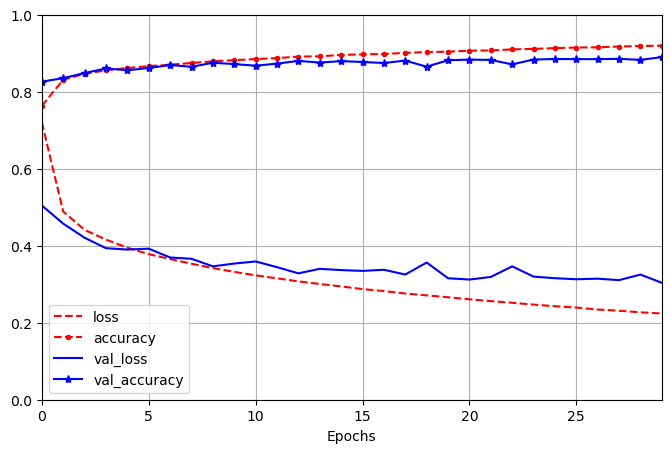

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5),
                                   xlim=[0,29],
                                   ylim=[0,1],
                                   grid=True,
                                   xlabel="Epochs",
                                   style=["r--","r--.","b-","b-*"])
plt.show()

In [27]:
model.evaluate(x_test,y_test)          #modeli test datalary bilen synlamak

313/313 [==============================] - 2s 5ms/step - loss: 0.3479 - accuracy: 0.8929


[0.3479000926017761, 0.8928999900817871]

In [33]:
test3 = x_test[:3]                     #modelin ilkinji 3 maglumatynyb almak
test3.shape



(3, 28, 28)

In [34]:
y_proba_predict = model.predict(test3)   #modeli predict etmek

1/1 [==============================] - 0s 317ms/step


In [35]:
y_proba_predict.round(2)     #modelin predictini togalamak

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
test1 = x_test[:1]
taze_proba = model.predict(test1)

1/1 [==============================] - 0s 56ms/step


In [37]:
taze_proba

array([[1.3736381e-07, 7.8775511e-09, 1.2888917e-06, 1.4565759e-08,
        1.0604792e-08, 9.9028424e-05, 2.1530298e-07, 8.0843375e-04,
        6.9381184e-07, 9.9909019e-01]], dtype=float32)

In [39]:
yeke_massiwli_predict = taze_proba.round(2)

In [47]:
yeke_massiwli_predict

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [56]:
import numpy as np
predict_last = yeke_massiwli_predict.argmax(axis=-1)
esik_predict = np.array(class_names)[predict_last]

In [59]:
esik_predict[0]

'Ankle boot'